# chapter 3
## NN elements
- network layer
- input data & target
- loss function : feedbeack signal
- optimizer : 학습 진행 방식

- 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터 정의
- 네트워크 정의, 입력과 타깃을 매핑하는 층으로 이루어짐
- 학습과정 : 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표 성정
- 훈련 데이터에 대한 모델의 fit() 메서드를 반복적으로 호출

## Chapter 3-4: 영화 리뷰 분류 : 이진 분류 예제

In [1]:
# IMDB
from keras.datasets import imdb

(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [2]:
print(f"train_type = {type(train_data)}")
print(f"shape = {train_data.shape}")

train_type = <class 'numpy.ndarray'>
shape = (25000,)


In [4]:
print(len(train_data[0]))
print(type(train_data[0]))


218
<class 'list'>


In [9]:
# 3.4.2 preparing data
"""
신경망에 list를 주입할 수 없고 tensor 형태로 주입해야 함
the way for converting list to tensor
1. 같은 길이가 되도록 List에 padding 을 추가하고 (samples, sequence_length)크기의 정수 텐서로 변환
2. list를 one-hot encoding해서 0,1 벡터로 변환.
ex) 시퀀스 [3,5]를 3과 5의 위치는 1이고 그외는 모두 0인 10,000차원의 벡터로 각각 변환
여기선 one-hot vector로 만듦
"""

# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i, sequences] = 1.  # results[i] 에서 특정 인덱스의 위치를 1로 만듦
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
x_train[0].shape

(10000,)

In [12]:
x_train[0].sum()

120.0

In [14]:
train_labels.shape

(25000,)

In [15]:
train_labels[0].shape

()

In [16]:
train_labels[0]

1

In [17]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [19]:
# model compile
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [20]:
# set optimizer
from keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [21]:
# loss, metrics
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [22]:
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
# training
model.compile(
    optimizer="rmsprop",
    loss = "binary_crossentropy",
    metrics=["acc"]
)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 8s 213ms/step - loss: 0.5803 - acc: 0.7301 - val_loss: 0.3758 - val_acc: 0.8722
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3185 - acc: 0.9024 - val_loss: 0.3076 - val_acc: 0.8851
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2261 - acc: 0.9274 - val_loss: 0.2778 - val_acc: 0.8902
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1762 - acc: 0.9477 - val_loss: 0.2967 - val_acc: 0.8803
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1401 - acc: 0.9585 - val_loss: 0.2825 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1136 - acc: 0.9669 - val_loss: 0.2956 - val_acc: 0.8869
Epoch 7/20
30/30 [==============================] - 2s 78ms/step - loss: 0.0933 - acc: 0.9772 - val_loss: 0.3122 - val_acc: 0.8812
Epoch 8/20
30/30 [==============================] - 2s 71ms/step - loss: 0.0753 - 

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

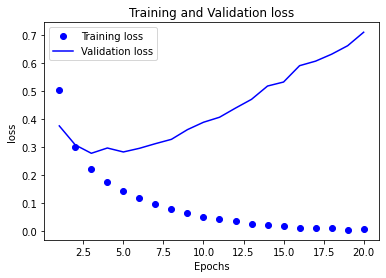

In [25]:
# plot training & validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

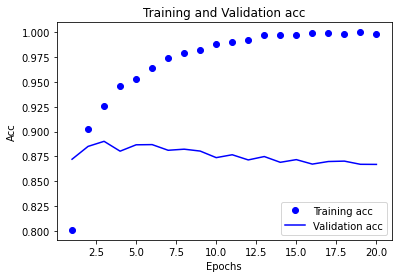

In [26]:
# plot training & validation accuracy
plt.clf()  # clear figure

acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
\